In [3]:
%pip install factor_analyzer


     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.8 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 296.2 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42624 sha256=2ece4c8881db978cab76ee50792fbee884b083da8e1b17fe8e03d277ff72899d
  Stored in directory: c:\users\theroot\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


# Interpretation of Results 
The factor loadings represent the correlation between each feature and the extracted factors.
High absolute values indicate a strong relationship between a feature and a factor.
We can interpret each factor based on the features that load highly onto it.
The variance explained and uniqueness metrics help assess the contribution and reliability of each factor.
Notice that the greater ‘uniqueness’ the lower the relevance of the variable in the factor model number of factors should be << than number of obs Varimax maximizes the variance in the loadings and is the most popular rotation

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer

In [3]:
df = pd.read_csv('student_data.csv')
# Quick overview of the dataset
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [4]:
# Handling missing values - fill missing values with the median
df.fillna(df.median(), inplace=True)

# Encode categorical variables if any
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].astype('category').cat.codes

# Standardize the features
scaler = StandardScaler()
features = df.drop('GradeClass', axis=1)
features_scaled = scaler.fit_transform(features)

# Define target variable
target = df['GradeClass']

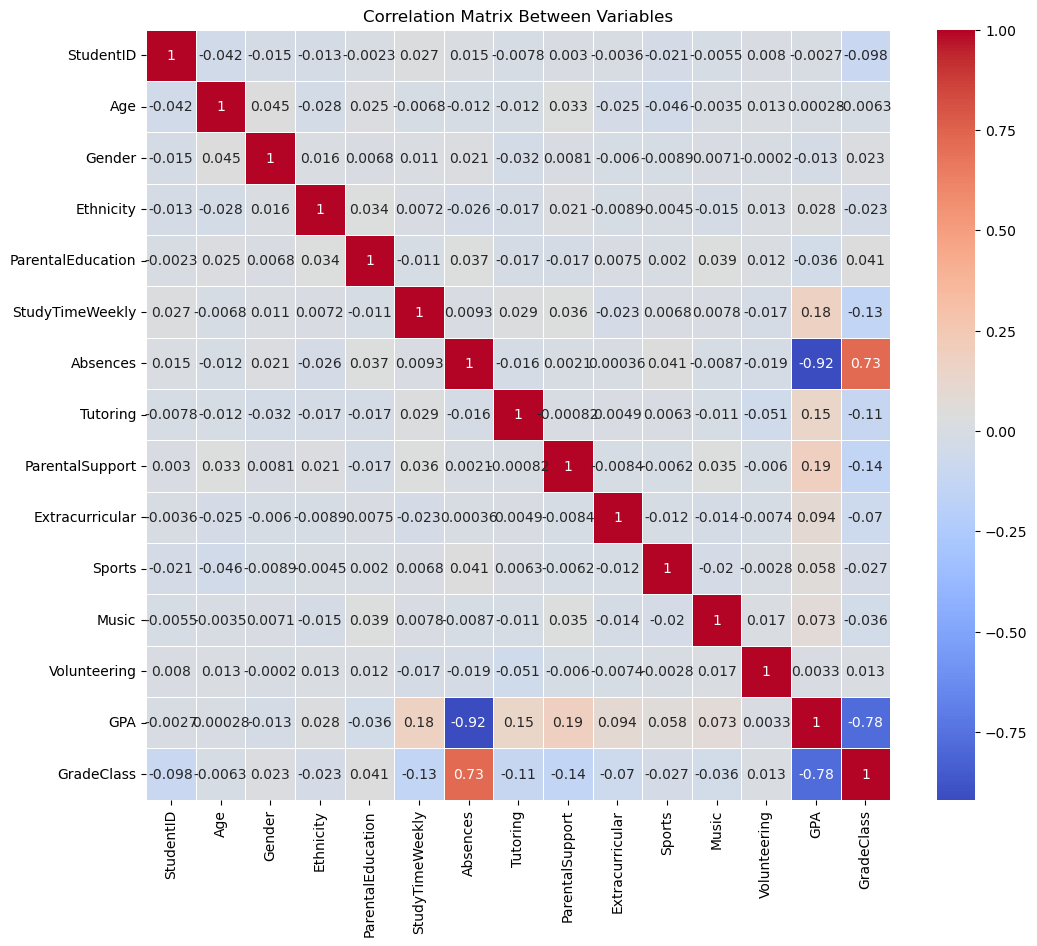

In [5]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Variables')
plt.show()

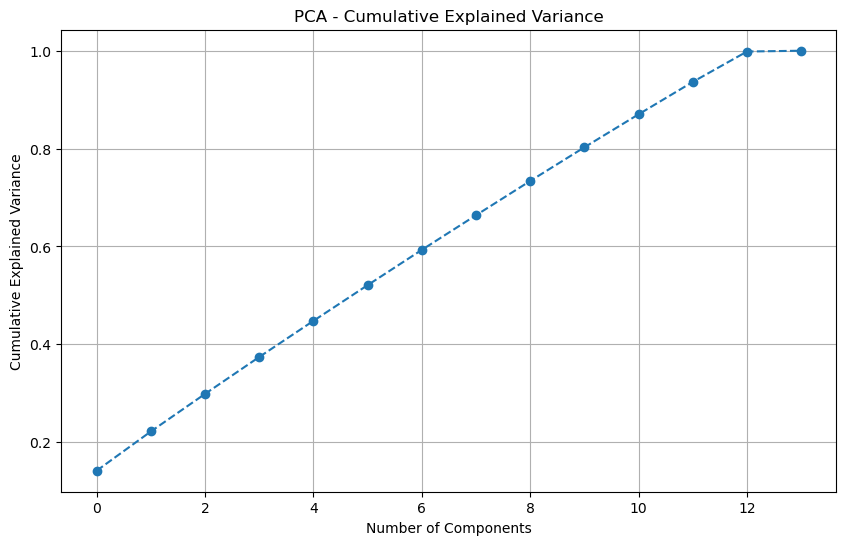


Explained Variance Ratios:
[0.14158525 0.08018665 0.07680071 0.0754476  0.0738533  0.07297248
 0.0721077  0.07077991 0.07003117 0.06882745 0.0674655  0.06619489
 0.06209483 0.00165258]

Eigenvalues:
[1.98302251 1.12308262 1.07565961 1.0567081  1.0343786  1.02204193
 1.00993    0.99133322 0.98084644 0.96398724 0.94491196 0.927116
 0.86969121 0.02314586]

Number of factors to retain (eigenvalues > 1): 4


In [11]:
# Principal Component Analysis (PCA) to determine number of factors
pca = PCA()
features_pca = pca.fit(features_scaled)

# Plot the explained variance to guide the decision of number of factors
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print explained variance ratios and eigenvalues
explained_variance = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
print("\nExplained Variance Ratios:")
print(explained_variance)
print("\nEigenvalues:")
print(eigenvalues)

n_factors = np.sum(eigenvalues >= 1.05)
print(f"\nNumber of factors to retain (eigenvalues > 1.05): {n_factors}")

# **4 Factors**

In [12]:
# Apply Factor Analysis with Varimax Rotation
fa = FactorAnalyzer(n_factors=4, rotation='varimax', method='ml')
fa.fit(features_scaled)

FactorAnalyzer(method='ml', n_factors=4, rotation='varimax', rotation_kwargs={})

In [13]:
# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=features.columns, 
                               columns=[f'Factor_{i+1}' for i in range(4)])
print("Factor Loadings (with Varimax Rotation):")
print(factor_loadings)

Factor Loadings (with Varimax Rotation):
                   Factor_1  Factor_2  Factor_3  Factor_4
StudentID         -0.008480  0.030159  0.002301  0.016082
Age                0.014166 -0.010866  0.033334 -0.055293
Gender            -0.017145  0.015801  0.009723  0.006627
Ethnicity          0.029496  0.002352  0.016997 -0.006186
ParentalEducation -0.039929 -0.003810 -0.011926  0.011240
StudyTimeWeekly    0.182519  0.978315 -0.045542 -0.050146
Absences          -0.969259  0.196474  0.130351  0.001094
Tutoring           0.026255  0.046872 -0.015201  0.438174
ParentalSupport    0.141941  0.056951  0.985526  0.018704
Extracurricular   -0.000543 -0.005720 -0.014185  0.346425
Sports            -0.034941  0.030517 -0.008800  0.330790
Music              0.018370  0.016173  0.028793  0.193463
Volunteering       0.013997 -0.021681 -0.006172 -0.035795
GPA                0.959421  0.020260  0.049127  0.267869


In [15]:
# Extract uniquenesses, variance, and cumulative variance
uniquenesses = pd.Series(fa.get_uniquenesses(), index=features.columns)
variance = fa.get_factor_variance()

# Display uniquenesses
print("\nUniquenesses:")
print(uniquenesses)



Uniquenesses:
StudentID            0.998755
Age                  0.995513
Gender               0.999318
Ethnicity            0.998797
ParentalEducation    0.998123
StudyTimeWeekly      0.004998
Absences             0.004942
Tutoring             0.804887
ParentalSupport      0.004998
Extracurricular      0.879755
Sports               0.888348
Music                0.961144
Volunteering         0.998015
GPA                  0.004933
dtype: float64


In [16]:
# Display variance explained by each factor
ss_loadings, prop_var, cum_var = variance
variance_df = pd.DataFrame({
    'SS Loadings': ss_loadings,
    'Proportion of Variance': prop_var,
    'Cumulative Variance': cum_var
}, index=[f'Factor_{i+1}' for i in range(4)])
print("\nVariance Explained by Factors:")
print(variance_df)


Variance Explained by Factors:
          SS Loadings  Proportion of Variance  Cumulative Variance
Factor_1     1.918888                0.137063             0.137063
Factor_2     1.004546                0.071753             0.208817
Factor_3     0.995760                0.071126             0.279942
Factor_4     0.538282                0.038449             0.318391


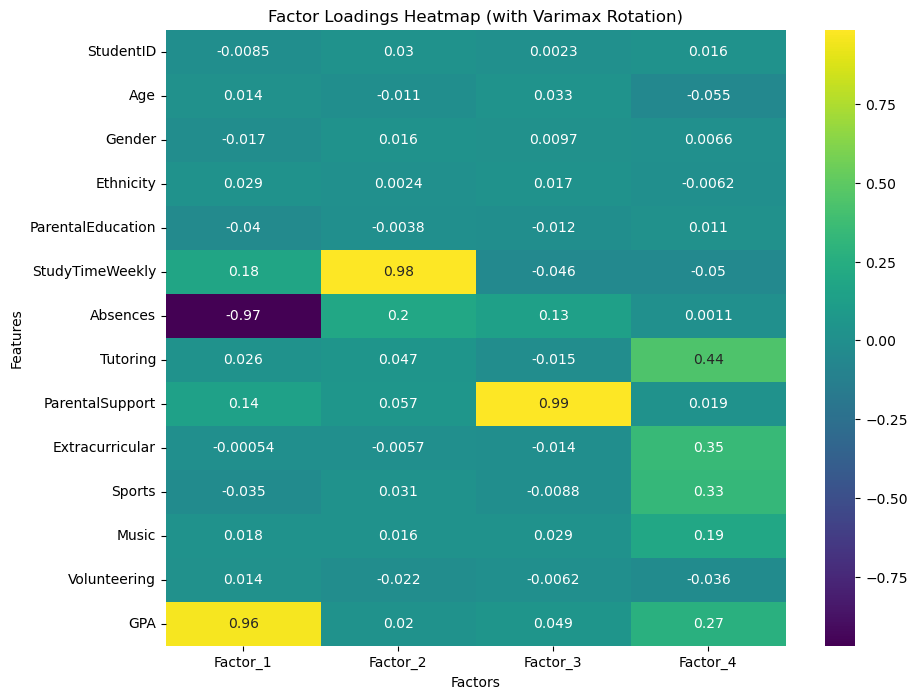

In [17]:
# Visualize the factor loadings
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='viridis')
plt.title('Factor Loadings Heatmap (with Varimax Rotation)')
plt.xlabel('Factors')
plt.ylabel('Features')
plt.show()

# **3 Factors**

In [21]:
# Apply Factor Analysis with Varimax Rotation
fa = FactorAnalyzer(n_factors=3, rotation='varimax', method='ml')
fa.fit(features_scaled)

FactorAnalyzer(method='ml', rotation='varimax', rotation_kwargs={})

In [23]:
# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=features.columns, 
                               columns=[f'Factor_{i+1}' for i in range(3)])
print("Factor Loadings (with Varimax Rotation):")
print(factor_loadings)

Factor Loadings (with Varimax Rotation):
                   Factor_1  Factor_2  Factor_3
StudentID         -0.012120  0.003037  0.031596
Age                0.012162  0.034497 -0.049619
Gender            -0.019116  0.009879  0.014944
Ethnicity          0.028199  0.017747 -0.001684
ParentalEducation -0.038090 -0.013111  0.004770
StudyTimeWeekly    0.033509  0.006318  0.533241
Absences          -0.987395  0.121502  0.073228
Tutoring           0.043581 -0.024280  0.376871
ParentalSupport    0.123151  0.988668  0.048705
Extracurricular    0.019811 -0.023777  0.271816
Sports            -0.020607 -0.017005  0.280714
Music              0.026031  0.024468  0.166206
Volunteering       0.015098 -0.005968 -0.040497
GPA                0.958410  0.060262  0.270007


In [24]:
# Extract uniquenesses, variance, and cumulative variance
uniquenesses = pd.Series(fa.get_uniquenesses(), index=features.columns)
variance = fa.get_factor_variance()

# Display uniquenesses
print("\nUniquenesses:")
print(uniquenesses)



Uniquenesses:
StudentID            0.998846
Age                  0.996200
Gender               0.999314
Ethnicity            0.998887
ParentalEducation    0.998354
StudyTimeWeekly      0.714492
Absences             0.004927
Tutoring             0.855479
ParentalSupport      0.004997
Extracurricular      0.925158
Sports               0.920486
Music                0.971099
Volunteering         0.998096
GPA                  0.004915
dtype: float64


In [25]:
# Display variance explained by each factor
ss_loadings, prop_var, cum_var = variance
variance_df = pd.DataFrame({
    'SS Loadings': ss_loadings,
    'Proportion of Variance': prop_var,
    'Cumulative Variance': cum_var
}, index=[f'Factor_{i+1}' for i in range(3)])
print("\nVariance Explained by Factors:")
print(variance_df)


Variance Explained by Factors:
          SS Loadings  Proportion of Variance  Cumulative Variance
Factor_1     1.916315                0.136880             0.136880
Factor_2     0.999761                0.071411             0.208291
Factor_3     0.692674                0.049477             0.257768


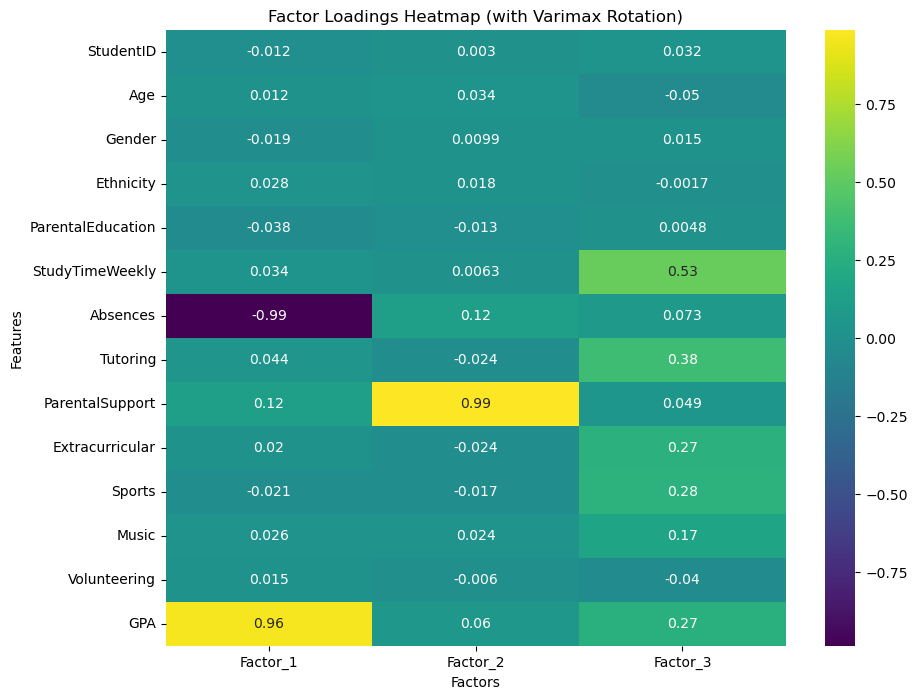

In [26]:
# Visualize the factor loadings
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='viridis')
plt.title('Factor Loadings Heatmap (with Varimax Rotation)')
plt.xlabel('Factors')
plt.ylabel('Features')
plt.show()

# **1 Factor**

In [28]:
# Apply Factor Analysis with Varimax Rotation
fa = FactorAnalyzer(n_factors=1, rotation='varimax', method='ml')
fa.fit(features_scaled)

C:\Users\theroot\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


FactorAnalyzer(method='ml', n_factors=1, rotation='varimax', rotation_kwargs={})

In [29]:
# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=features.columns, 
                               columns=[f'Factor_{i+1}' for i in range(1)])
print("Factor Loadings (with Varimax Rotation):")
print(factor_loadings)

Factor Loadings (with Varimax Rotation):
                   Factor_1
StudentID          0.003058
Age               -0.000591
Gender             0.013664
Ethnicity         -0.027813
ParentalEducation  0.036042
StudyTimeWeekly   -0.174513
Absences           0.921117
Tutoring          -0.141928
ParentalSupport   -0.185932
Extracurricular   -0.091642
Sports            -0.055149
Music             -0.071723
Volunteering      -0.003670
GPA               -0.997512


In [30]:
# Extract uniquenesses, variance, and cumulative variance
uniquenesses = pd.Series(fa.get_uniquenesses(), index=features.columns)
variance = fa.get_factor_variance()

# Display uniquenesses
print("\nUniquenesses:")
print(uniquenesses)



Uniquenesses:
StudentID            0.999991
Age                  1.000000
Gender               0.999813
Ethnicity            0.999226
ParentalEducation    0.998701
StudyTimeWeekly      0.969545
Absences             0.151543
Tutoring             0.979856
ParentalSupport      0.965429
Extracurricular      0.991602
Sports               0.996959
Music                0.994856
Volunteering         0.999987
GPA                  0.004970
dtype: float64


In [31]:
# Display variance explained by each factor
ss_loadings, prop_var, cum_var = variance
variance_df = pd.DataFrame({
    'SS Loadings': ss_loadings,
    'Proportion of Variance': prop_var,
    'Cumulative Variance': cum_var
}, index=[f'Factor_{i+1}' for i in range(1)])
print("\nVariance Explained by Factors:")
print(variance_df)


Variance Explained by Factors:
          SS Loadings  Proportion of Variance  Cumulative Variance
Factor_1     1.947522                0.139109             0.139109


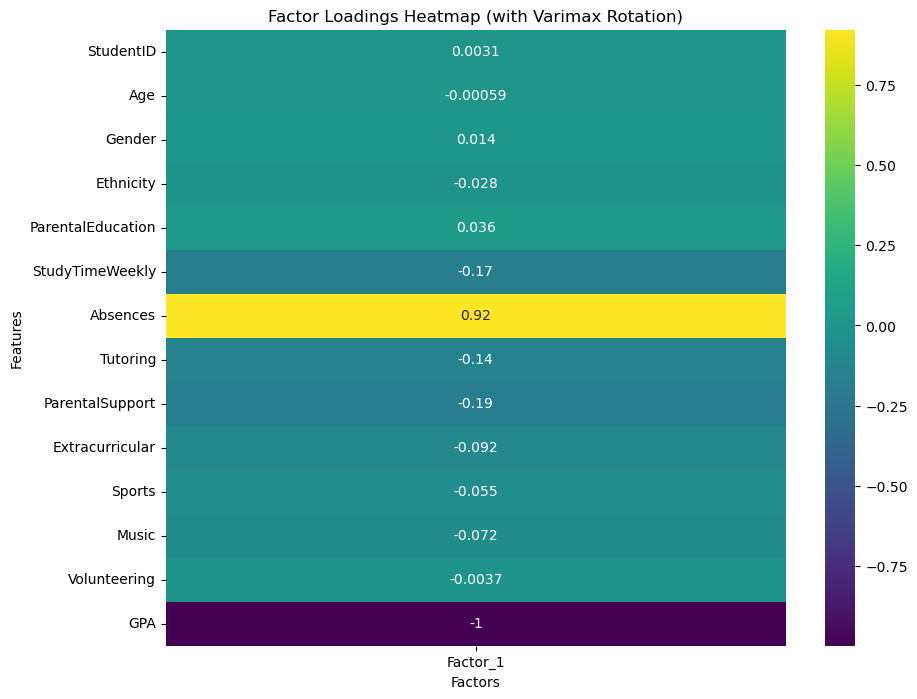

In [32]:
# Visualize the factor loadings
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='viridis')
plt.title('Factor Loadings Heatmap (with Varimax Rotation)')
plt.xlabel('Factors')
plt.ylabel('Features')
plt.show()

# **2 Factors**

In [33]:
# Apply Factor Analysis with Varimax Rotation
fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='ml')
fa.fit(features_scaled)

FactorAnalyzer(method='ml', n_factors=2, rotation='varimax', rotation_kwargs={})

In [34]:
# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=features.columns, 
                               columns=[f'Factor_{i+1}' for i in range(2)])
print("Factor Loadings (with Varimax Rotation):")
print(factor_loadings)

Factor Loadings (with Varimax Rotation):
                   Factor_1  Factor_2
StudentID         -0.009698  0.029954
Age                0.006703 -0.027677
Gender            -0.018284  0.019277
Ethnicity          0.027190  0.005728
ParentalEducation -0.037001  0.000090
StudyTimeWeekly    0.075370  0.470350
Absences          -0.982768  0.171008
Tutoring           0.074277  0.319813
ParentalSupport    0.084684  0.481113
Extracurricular    0.042242  0.229727
Sports             0.002415  0.242321
Music              0.038016  0.158819
Volunteering       0.012078 -0.038955
GPA                0.973347  0.218371


In [35]:
# Extract uniquenesses, variance, and cumulative variance
uniquenesses = pd.Series(fa.get_uniquenesses(), index=features.columns)
variance = fa.get_factor_variance()

# Display uniquenesses
print("\nUniquenesses:")
print(uniquenesses)



Uniquenesses:
StudentID            0.999009
Age                  0.999189
Gender               0.999294
Ethnicity            0.999228
ParentalEducation    0.998631
StudyTimeWeekly      0.773090
Absences             0.004923
Tutoring             0.892202
ParentalSupport      0.761359
Extracurricular      0.945441
Sports               0.941275
Music                0.973331
Volunteering         0.998337
GPA                  0.004911
dtype: float64


In [36]:
# Display variance explained by each factor
ss_loadings, prop_var, cum_var = variance
variance_df = pd.DataFrame({
    'SS Loadings': ss_loadings,
    'Proportion of Variance': prop_var,
    'Cumulative Variance': cum_var
}, index=[f'Factor_{i+1}' for i in range(2)])
print("\nVariance Explained by Factors:")
print(variance_df)


Variance Explained by Factors:
          SS Loadings  Proportion of Variance  Cumulative Variance
Factor_1     1.937569                0.138398             0.138398
Factor_2     0.772211                0.055158             0.193556


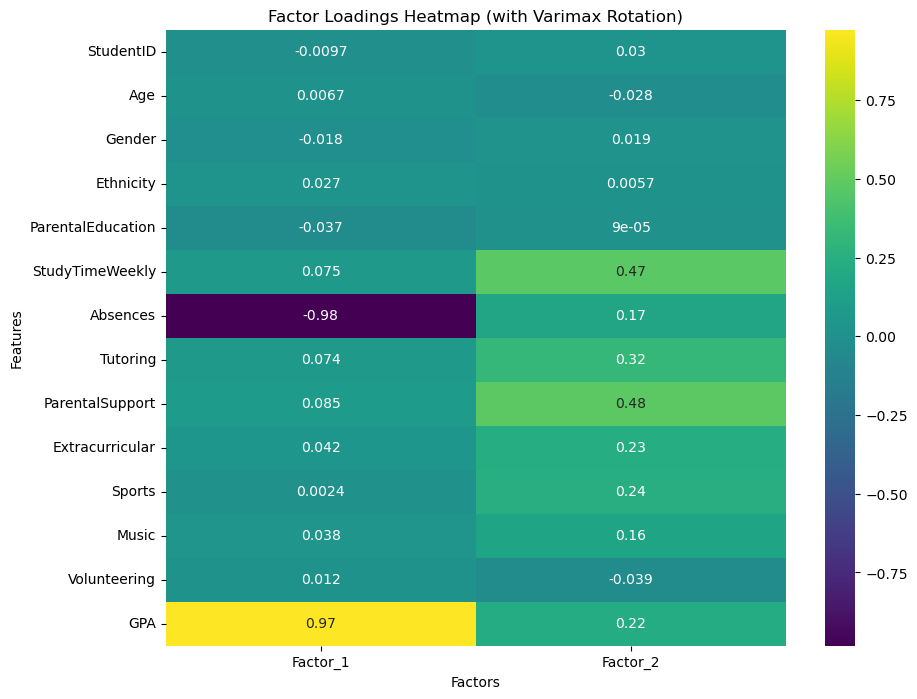

In [37]:
# Visualize the factor loadings
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='viridis')
plt.title('Factor Loadings Heatmap (with Varimax Rotation)')
plt.xlabel('Factors')
plt.ylabel('Features')
plt.show()